<i>Двойка 6, матрица смежности</i>

<h5>Пункт 1 - загрузка матрицы смежности</h5>

In [261]:
from collections import deque

In [262]:
matrix = [
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
]

<h5>Пункт 2</h5>

<i>Функция для обхода графа в ширину</i>

In [263]:
def bfs(matrix, start_node):
    visited = [False] * len(matrix)
    queue = deque()
    queue.append(start_node)
    visited[start_node] = True
    result = []

    while queue:
        node = queue.popleft()
        result.append(node + 1)  

        for i, value in enumerate(matrix[node]):
            if value == 1 and not visited[i]:
                queue.append(i)
                visited[i] = True

    return result



In [264]:
bfs(matrix, 0)

[1, 6, 9, 3, 8, 16, 2, 4, 5, 13, 19, 18, 12, 10, 17, 14, 7, 11, 15, 20]

<i>Функция для обхода в глубину</i>

In [265]:
def dfs(matrix, node, visited):
    visited[node] = True
    result = [node + 1]  # Добавляем 1 к индексу в результат
    for i, value in enumerate(matrix[node]):
        if value == 1 and not visited[i]:
            result += dfs(matrix, i, visited)
    return result


In [266]:
visited = [False] * len(matrix)
dfs(matrix, 0, visited)

[1, 6, 3, 2, 4, 5, 9, 8, 13, 18, 10, 14, 17, 7, 11, 15, 20, 19, 12, 16]

<h5>Пункт 3</h5>

<i>Поиск с помощью BFS</i>

In [267]:
def bfs_find(matrix):
    lv = [0, 0]  # самые большие вершины
    lp = [[], []]  # пути к вершинам

    for start_node in range(len(matrix)):
        visited = [False] * len(matrix)
        queue = deque()
        queue.append(start_node)
        visited[start_node] = True
        result = []

        while queue:
            node = queue.popleft()
            result.append(node)

            for i, value in enumerate(matrix[node]):
                if value == 1 and not visited[i]:
                    queue.append(i)
                    visited[i] = True

        if len(result) > len(lp[0]):
            lp[1] = lp[0]
            lp[0] = result
            lv[1] = lv[0]
            lv[0] = start_node
        elif len(result) > len(lp[1]):
            lp[1] = result
            lv[1] = start_node

    return lv, lp


In [268]:
import time

start_time = time.time()
lv, lp = bfs_find(matrix)
end_time = time.time()
bfs_time = end_time - start_time

print("Самые большие вершины и их пути (BFS):")
print(lv, lp)
print("Время выполнения BFS: {:.10f} секунд".format(bfs_time))


Самые большие вершины и их пути (BFS):
[0, 1] [[0, 5, 8, 2, 7, 15, 1, 3, 4, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19], [1, 2, 3, 4, 5, 0, 8, 7, 15, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19]]
Время выполнения BFS: 0.0000000000 секунд


<i>Поиск с помощью DFS</i>

In [269]:
def dfs_find(matrix):
    def dfs(node, visited, path):
        visited[node] = True
        path.append(node)

        for i, value in enumerate(matrix[node]):
            if value == 1 and not visited[i]:
                dfs(i, visited, path)

    lv = [0, 0]  
    lp = [[], []]  

    for start_node in range(len(matrix)):
        visited = [False] * len(matrix)
        path = []
        dfs(start_node, visited, path)

        if len(path) > len(lp[0]):
            lp[1] = lp[0]
            lp[0] = path
            lv[1] = lv[0]
            lv[0] = start_node
        elif len(path) > len(lp[1]):
            lp[1] = path
            lv[1] = start_node

    return lv, lp

In [270]:
start_time = time.time()
lv, lp = dfs_find(matrix)
end_time = time.time()
dfs_execution_time = end_time - start_time

print("Самые большие вершины и их пути (DFS):")
print(lv, lp)
print("Время выполнения DFS: {:.10f} секунд".format(dfs_execution_time))

Самые большие вершины и их пути (DFS):
[0, 1] [[0, 5, 2, 1, 3, 4, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15], [1, 2, 3, 4, 5, 0, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15]]
Время выполнения DFS: 0.0000000000 секунд


Скорость выполнения обоих алгоритмов высокая для малых вычичслений, как в нашем примере, поэтому время выполнения в обоих случаях стремится к 0.

<h5>Пункт 4</h5>

Да, в python есть библиотеки, которые предоставляют поиск в ширину и в глубину. Одна из таких библиотек была использована в п.2-п.3 - библиотека queue. Мы испрользовали ее класс deque, который предоставляет двустороннюю очередь для эффективной реализации BFS. 
В python есть и другие библиотеки, позволяющие выполнять поиск в ширину и глубину, например - библиотека NetworkX, которая предоставляет инструменты для создания, манипулирования и анализа графов, в том числе обход графов. Также - библиотека igraph, которая выполняет все те же функции, но имеет большую производительность.
Ниже приведены коды для нахождения Bfs и Dfs с помощью этих библиотек соотвественно.

In [271]:
import networkx as nx

G = nx.DiGraph()

for i in range(len(matrix)):
    G.add_node(i)

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == 1:
            G.add_edge(i, j)

bfs_result_nx = list(nx.bfs_tree(G, source=0))
print("Результат поиска в ширину:", bfs_result_nx)

dfs_result_nx = list(nx.dfs_tree(G, source=0))
print("Результат поиска в глубину:", dfs_result_nx)

Результат поиска в ширину: [0, 5, 8, 2, 7, 15, 1, 3, 4, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19]
Результат поиска в глубину: [0, 5, 2, 1, 3, 4, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15]


In [272]:
from igraph import Graph

G = Graph(directed=True)

for i in range(len(matrix)):
    G.add_vertex(i)

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == 1:
            G.add_edge(i, j)

bfs_result = G.bfs(0)
print("Результат поиска в ширину:", bfs_result)

dfs_result = G.dfs(0)
print("Результат поиска в глубину:", dfs_result)


Результат поиска в ширину: ([0, 5, 8, 2, 7, 15, 1, 3, 4, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19], [0, 1, 3, 6, 11, 13, 15, 20], [-1, 2, 5, 2, 2, 0, 16, 8, 0, 17, 16, 18, 7, 9, 16, 8, 17, 12, 7, 16])
Результат поиска в глубину: ([0, 8, 15, 7, 18, 11, 12, 17, 16, 19, 14, 10, 9, 13, 6, 5, 2, 4, 3, 1], [-1, 0, 8, 8, 7, 18, 7, 12, 17, 16, 16, 16, 16, 9, 16, 0, 5, 2, 2, 2])


C:\Users\n0ves\AppData\Local\Temp\ipykernel_14740\4032270294.py:6: DeprecationWarning: You are using integers as vertex names. This is discouraged because most igraph functions interpret integers as vertex _IDs_ and strings as vertex names. For sake of consistency, convert your vertex names to strings before assigning them. Future versions from igraph 0.11.0 will disallow integers as vertex names.
  G.add_vertex(i)


Сравнивая библиотеку networkx с функциями dfs и bfs, можно заметить ряд отличий:
- Индексы вершин в библиотеке начинаются с 0, тогда как в наших функциях - с 1.
- Код с помощью библиотеки намного короче кодов функций, так как библиотека имеет встроенные функции.

Сравнивая библиотеку igraph с функциями dfs и bfs, можно заметить ряд отличий:
- Индексы вершин в библиотеке начинаются с 0, тогда как в наших функциях - с 1.
- Код с помощью библиотеки намного короче кодов функций, так как библиотека имеет встроенные функции.
- Встроенная функция библиотеки воспринимает значения в формате id или str, а наши функции - в int.


<h5>Пункт 5</h5>

<i>Построение графика времени выполнения Bfs и Dfs</i>

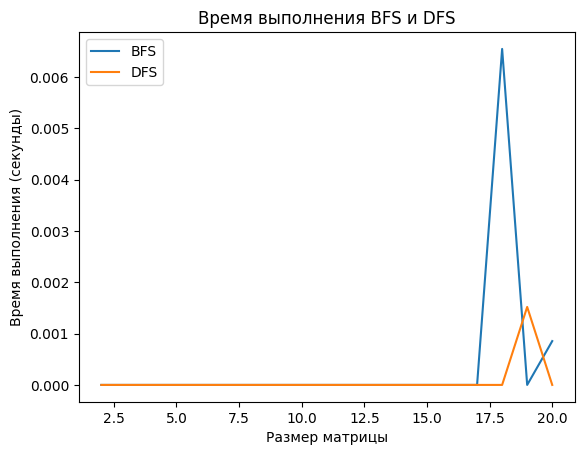

In [273]:
import time
import matplotlib.pyplot as plt

def bfs_execution_time(matrix):
    start_time = time.time()
    bfs_find(matrix)
    end_time = time.time()
    return end_time - start_time

def dfs_execution_time(matrix):
    start_time = time.time()
    dfs_find(matrix)
    end_time = time.time()
    return end_time - start_time

matrix_sizes = []

bfs_times = []
dfs_times = []

for i in range(2, 21):
    size = i
    matrix_sizes.append(size)
    sub_matrix = [row[:size] for row in matrix[:size]]  
    bfs_time = bfs_execution_time(sub_matrix)
    dfs_time = dfs_execution_time(sub_matrix)
    bfs_times.append(bfs_time)
    dfs_times.append(dfs_time)

plt.plot(matrix_sizes, bfs_times, label='BFS')
plt.plot(matrix_sizes, dfs_times, label='DFS')
plt.xlabel('Размер матрицы')
plt.ylabel('Время выполнения (секунды)')
plt.legend()
plt.title('Время выполнения BFS и DFS')
plt.show()


В результате анализа времени выполнения алгоритмов обхода графа в ширину (BFS) и в глубину (DFS) было обнаружено, что время выполнения обоих алгоритмов соизмеримо и стремится к нулю, так как граф, данный для анализа, имеет простую структуру и относительно малый размер. Однако при многократных запусках наблюдаются случайные скачки времени выполнения. Эти скачки могут быть вызваны различными случайными факторами, такими как загрузка системы. Из-за случайных скачков времени выполнения нельзя однозначно утверждать, что один из алгоритмов работает значительно быстрее другого на данном графе.

<i>Количество узлов для каждой вершины</i>

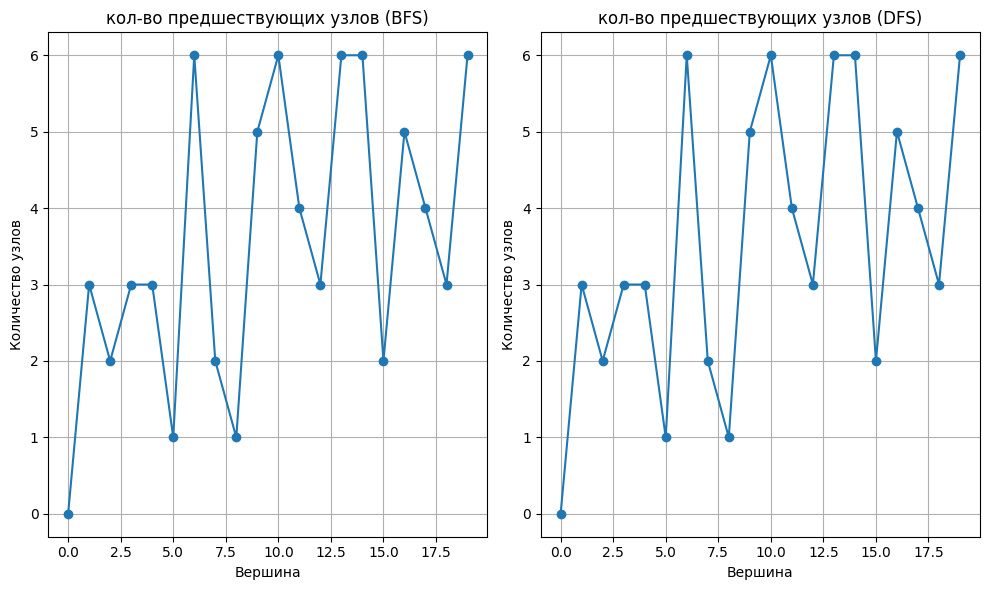

In [276]:
import numpy as np

matrix

bfs_order = bfs_result_nx
dfs_order = dfs_result_nx

G = nx.Graph()

for i in range(len(matrix)):
    G.add_node(i)
    for j in range(i + 1, len(matrix[i])):
        if matrix[i][j] == 1:
            G.add_edge(i, j)

bfs_counts = []
dfs_counts = []

for node in sorted(bfs_order):
    bf = nx.single_source_shortest_path_length(G, source=0)
    count = bf.get(node, np.inf)
    bfs_counts.append(count)

for node in sorted(dfs_order):
    df = nx.shortest_path(G, source=0, target=node)
    count = len(df) - 1  
    dfs_counts.append(count)

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(sorted(bfs_order), bfs_counts, marker='o')
plt.xlabel('Вершина')
plt.ylabel('Количество узлов')
plt.title('кол-во предшествующих узлов (BFS)')
plt.grid(True)

plt.subplot(122)
plt.plot(sorted(dfs_order), dfs_counts, marker='o')
plt.xlabel('Вершина')
plt.ylabel('Количество узлов')
plt.title('кол-во предшествующих узлов (DFS)')
plt.grid(True)

plt.tight_layout()
plt.show()
